In [1]:
import pandas as pd
df = pd.read_csv('posts.csv') 
#df.head(20) 
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

df['Year'] = df['ClosedDate'].dt.year

df.head(5)


C:\Users\RAMBO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Body,OwnerUserId,OwnerDisplayName,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,Year
0,0,72,1,-999,-999,2008-08-01T13:38:27.133,<p>I want to format my existing comments as 'R...,25,NaN,How do I add existing comments to RDoc in Ruby?,<ruby><rdoc>,2,1,1,2017-04-20 07:24:44.697,NaN,2017
1,1,85,1,154,-999,2008-08-01T14:19:52.510,<p>What are the best practices around creating...,59,NaN,Flat file databases,<php><sql><database><flat-file>,12,1,22,2015-10-22 13:43:51.340,NaN,2015
2,2,90,1,1466832,-999,2008-08-01T14:41:24.277,"<p>How do you <a href=""http://svnbook.red-bean...",58,Christopher McCulloh,How do you branch and merge with TortoiseSVN?,<svn><tortoisesvn><branch><branching-and-merging>,3,0,91,2012-12-26 03:45:49.847,NaN,2012
3,3,108,1,111,-999,2008-08-01T15:22:29.467,"<p>I've been using <a href=""http://tortoisesvn...",72,NaN,Best Subversion clients for Windows Vista (64bit),<windows><svn><64bit>,8,0,2,2012-08-15 19:45:13.350,NaN,2012
4,4,126,1,127,-999,2008-08-01T16:10:30.337,"<p>What is the ""purist"" or ""correct"" way to ac...",58,NaN,How would you access Object properties from wi...,<java><php><oop><theory>,18,0,4,2012-05-08 18:11:27.270,NaN,2012


## Closed Questions Ratio

In [2]:
df['Year'].value_counts(normalize=True).sort_index(ascending=True)*100

2008     0.024289
2009     0.146415
2010     0.765508
2011     3.459794
2012     9.220342
2013    15.210542
2014    16.404925
2015    13.302777
2016    14.719171
2017    14.988667
2018    11.757570
Name: Year, dtype: float64

In [3]:
df['Year'].value_counts()

2014    120223
2013    111470
2017    109844
2016    107869
2015     97489
2018     86165
2012     67571
2011     25355
2010      5610
2009      1073
2008       178
Name: Year, dtype: int64

In [4]:
total = (732847/14322880)*100
total

5.1166176076319845

In [18]:

df1 = pd.read_csv('Votes.csv')
df2 = pd.read_csv('PostHistory.csv')
dfinal = df1.merge(df2, on="Id")
dfinal = dfinal[['VoteTypeId', 'CreationDate_y']]
dfinal.head(5)

,VoteTypeId,CreationDate_y
0,2,2008-08-06T21:14:57.507
1,2,2008-08-10T08:08:21.657
2,2,2008-08-10T17:50:11.467
3,2,2008-08-10T21:58:24.913
4,2,2008-08-12T05:24:36.307


In [19]:
dfinal = dfinal[dfinal['VoteTypeId'] == 5]
dfinal.head(5)

,VoteTypeId,CreationDate_y
256,5,2008-11-10T16:10:54.707
257,5,2008-11-10T17:49:44.727
258,5,2008-11-10T01:35:00.840
260,5,2008-11-11T09:23:55.963
262,5,2008-11-11T21:04:31.650


In [20]:
dfinal['CreationDate_y'] = pd.to_datetime(dfinal['CreationDate_y'])

dfinal['Year'] = dfinal['CreationDate_y'].dt.year
dfinal.head(5)

,VoteTypeId,CreationDate_y,Year
256,5,2008-11-10 16:10:54.707,2008
257,5,2008-11-10 17:49:44.727,2008
258,5,2008-11-10 01:35:00.840,2008
260,5,2008-11-11 09:23:55.963,2008
262,5,2008-11-11 21:04:31.650,2008


In [21]:
dfinal['Year'].value_counts(normalize=True).sort_index(ascending=True)*100

2008     0.501238
2009     2.617574
2010     3.570545
2011     7.029703
2012    10.717822
2013    16.930693
2014    16.373762
2015    11.200495
2016    11.435644
2017    11.998762
2018     7.623762
Name: Year, dtype: float64

In [23]:
dfinal['Year'].value_counts().sort_index(ascending=True)

2008      81
2009     423
2010     577
2011    1136
2012    1732
2013    2736
2014    2646
2015    1810
2016    1848
2017    1939
2018    1232
Name: Year, dtype: int64

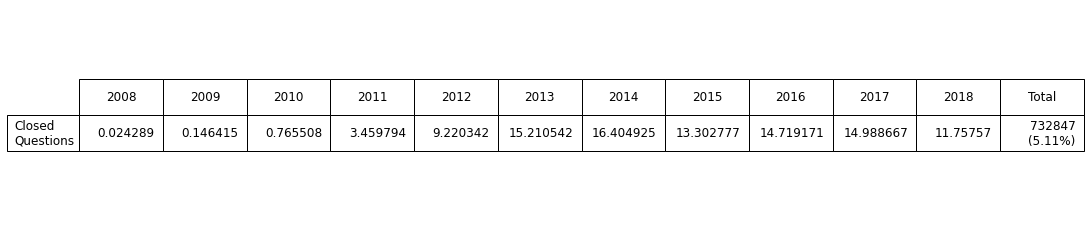

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax =plt.subplots()
data=[[0.024289,0.146415,0.765508,
      3.459794,9.220342,15.210542,
      16.404925,13.302777,14.719171,14.988667,11.757570,"732847\n(5.11%)"]]

column_labels=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018","Total"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table=ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Closed\nQuestions"],loc="center")
table.set_fontsize(20)
table.scale(3, 3)
plt.show()

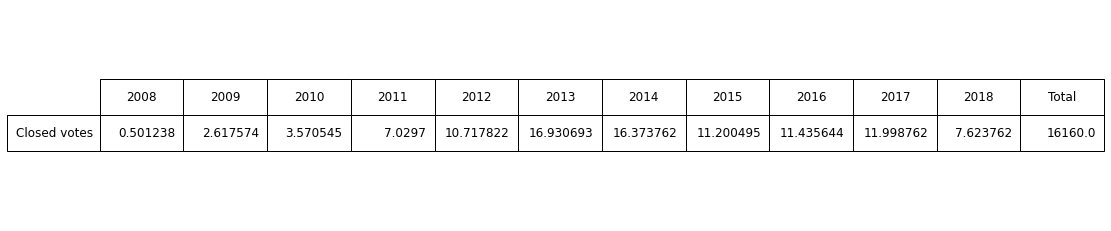

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax =plt.subplots()
data=[[0.501238,2.617574,3.570545,7.02970,10.717822,16.930693,16.373762,11.200495,11.435644,11.998762,7.623762,16160]]

column_labels=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018","Total"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table=ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Closed votes"],loc="center")
table.set_fontsize(30)
table.scale(3,3)
plt.show()

In [12]:
import pandas as pd
df = pd.read_csv('PostHistory.csv')
#df.head(25)
rslt_df = df[df['PostHistoryTypeId'] == 10]
rslt_df.head(5)

,Unnamed: 0,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,UserDisplayName,Comment,Text
33047,33047,1259878,10,96463,acf21790-d5cf-4111-b43a-0fc252c68e53,2008-10-22T05:30:23.000,-1,NaN,2,"{""Voters"":[{""Id"":13281,""DisplayName"":""user1328..."
33048,33048,1259896,10,101974,427a2219-6744-40fd-bba8-347457cfb23f,2008-09-26T18:19:33.000,-1,NaN,2,"{""Voters"":[{""Id"":7595,""DisplayName"":""user7595""}]}"
33049,33049,1259916,10,113013,fc2883cb-c2b3-4772-ba4d-5b7dd8ae0056,2008-12-27T06:18:31.000,-1,NaN,2,"{""Voters"":[{""Id"":19377,""DisplayName"":""user1937..."
33050,33050,1259922,10,116523,65207d94-b481-41f6-abfb-0078ffdc3624,2008-09-22T20:45:52.000,-1,NaN,1,"{""OriginalQuestionIds"":[7074],""Voters"":[{""Id"":..."
33051,33051,1259929,10,121922,3f9a92cd-87dd-4ed1-98e4-72220e1b9972,2008-09-24T09:56:44.000,-1,NaN,2,"{""Voters"":[{""Id"":342,""DisplayName"":""user342""}]}"


In [13]:
rslt_df['Comment'].value_counts(normalize=True)*100

101    46.378417
102    15.708891
1       8.248025
104     6.673571
103     6.533137
4       5.491815
3       3.272398
105     2.919687
2       2.390351
7       2.383709
Name: Comment, dtype: float64

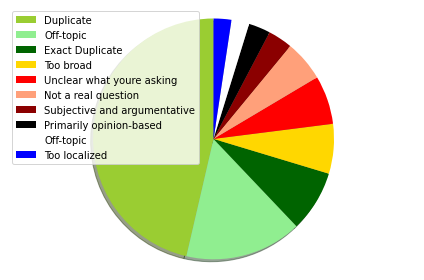

In [14]:
import matplotlib.pyplot as plt

labels = ['Duplicate','Off-topic','Exact Duplicate','Too broad','Unclear what youre asking','Not a real question','Subjective and argumentative',
         'Primarily opinion-based','Off-topic','Too localized']
sizes = ['46.378417','15.708891','8.248025','6.673571','6.533137','5.491815','3.272398','2.919687','2.390351','2.383709']
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred','black','white','blue']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()